In [2]:
import os
import tarfile
import urllib
import pandas as pd

In [3]:
def load_flat_data():
    return pd.read_csv("E:\ITMOflat2021\data.csv")

In [4]:
flat = load_flat_data()

In [5]:
flat.head()

,index,kitchen_area,bath_area,other_area,gas,hot_water,central_heating,extra_area,extra_area_count,year,ceil_height,floor_max,floor,total_area,bath_count,extra_area_type_name,district_name,rooms_count,price
0,0,19,19,11.709233,No,Yes,Yes,12,1,1942,3.98,5,2,53.709233,2,loggia,Petrogradskij,0,8366331
1,1,17,21,65.196263,No,Yes,Yes,3,1,1959,2.50,9,9,104.196263,2,balcony,Kirovskij,6,11004979
2,2,26,31,11.816443,Yes,Yes,No,13,0,1999,4.92,14,14,73.149777,2,balcony,Krasnoselskij,1,7780920
3,3,12,31,28.539965,Yes,No,Yes,8,1,1936,2.50,3,3,74.206632,2,loggia,Nevskij,2,9682538
4,4,15,30,26.616288,No,Yes,Yes,11,1,2012,3.80,11,4,75.282955,2,balcony,Centralnyj,1,11304146


In [6]:
flat.tail()

,index,kitchen_area,bath_area,other_area,gas,hot_water,central_heating,extra_area,extra_area_count,year,ceil_height,floor_max,floor,total_area,bath_count,extra_area_type_name,district_name,rooms_count,price
99995,99995,19,14,12.268533,Yes,Yes,Yes,13,2,2002,2.50,18,18,49.601866,1,balcony,Krasnoselskij,0,5538427
99996,99996,22,13,11.377047,Yes,Yes,Yes,9,1,1915,3.87,2,1,49.377047,1,loggia,Petrogradskij,0,7602367
99997,99997,22,21,12.520022,No,No,Yes,19,0,1954,2.50,7,1,61.853355,2,loggia,Petrogradskij,1,8687231
99998,99998,11,16,43.556108,No,Yes,Yes,11,1,1996,2.50,9,4,74.222775,2,loggia,Centralnyj,4,10838866
99999,99999,16,21,64.303288,Yes,Yes,Yes,5,1,1947,2.50,5,1,102.969954,2,loggia,Krasnoselskij,5,10852292


In [7]:
flat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   index                 100000 non-null  int64  
 1   kitchen_area          100000 non-null  int64  
 2   bath_area             100000 non-null  int64  
 3   other_area            100000 non-null  float64
 4   gas                   100000 non-null  object 
 5   hot_water             100000 non-null  object 
 6   central_heating       100000 non-null  object 
 7   extra_area            100000 non-null  int64  
 8   extra_area_count      100000 non-null  int64  
 9   year                  100000 non-null  int64  
 10  ceil_height           100000 non-null  float64
 11  floor_max             100000 non-null  int64  
 12  floor                 100000 non-null  int64  
 13  total_area            100000 non-null  float64
 14  bath_count            100000 non-null  int64  
 15  e

In [8]:
flat.isnull().sum()

index                   0
kitchen_area            0
bath_area               0
other_area              0
gas                     0
hot_water               0
central_heating         0
extra_area              0
extra_area_count        0
year                    0
ceil_height             0
floor_max               0
floor                   0
total_area              0
bath_count              0
extra_area_type_name    0
district_name           0
rooms_count             0
price                   0
dtype: int64

In [9]:
flat["gas"].value_counts()

Yes    50029
No     49971
Name: gas, dtype: int64

In [10]:
flat["hot_water"].value_counts()

Yes    64787
No     35213
Name: hot_water, dtype: int64

In [11]:
flat["central_heating"].value_counts()

Yes    89968
No     10032
Name: central_heating, dtype: int64

In [12]:
flat["extra_area"].value_counts().sort_values()

0     2428
20    2484
15    4899
7     4945
18    4957
12    4961
10    4967
9     4976
5     4982
17    4989
2     4992
16    4999
11    5003
3     5003
13    5018
1     5029
19    5034
14    5038
4     5047
8     5122
6     5127
Name: extra_area, dtype: int64

In [13]:
flat["extra_area_type_name"].value_counts()

balcony    50155
loggia     49845
Name: extra_area_type_name, dtype: int64

In [14]:
flat["district_name"].value_counts()

Kirovskij        14447
Petrogradskij    14392
Krasnoselskij    14350
Moskovskij       14276
Centralnyj       14203
Vyborgskij       14182
Nevskij          14150
Name: district_name, dtype: int64

In [15]:
flat.describe()

,index,kitchen_area,bath_area,other_area,extra_area,extra_area_count,year,ceil_height,floor_max,floor,total_area,bath_count,rooms_count,price
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05
mean,49999.500000,16.499250,21.482350,28.280992,9.990920,1.001090,1960.06910,3.130120,9.073740,5.043840,69.592899,1.699550,1.480480,9.195727e+06
std,28867.657797,5.759919,8.639641,20.476935,5.782708,0.706678,34.60658,0.810827,5.806507,4.251468,23.005842,0.458456,1.717466,3.379607e+06
min,0.000000,7.000000,7.000000,11.000000,0.000000,0.000000,1900.00000,2.500000,1.000000,1.000000,25.647034,1.000000,0.000000,2.757564e+06
25%,24999.750000,11.000000,14.000000,13.011560,5.000000,1.000000,1930.00000,2.500000,4.000000,2.000000,53.222280,1.000000,0.000000,6.744855e+06
50%,49999.500000,17.000000,21.000000,18.984819,10.000000,1.000000,1960.00000,2.510000,8.000000,4.000000,64.518983,2.000000,1.000000,8.496955e+06
75%,74999.250000,21.000000,29.000000,37.171975,15.000000,2.000000,1990.00000,3.760000,13.000000,7.000000,80.716989,2.000000,2.000000,1.096428e+07
max,99999.000000,26.000000,36.000000,90.983329,20.000000,2.000000,2020.00000,5.000000,24.000000,24.000000,159.408240,2.000000,9.000000,2.623385e+07


In [16]:
flat["total_area"].sort_values()

95691     25.647034
91965     26.031452
34531     26.295571
5631      26.366295
5900      26.441628
            ...    
44213    154.054225
30016    154.088597
71181    154.650614
97489    156.827294
87260    159.408240
Name: total_area, Length: 100000, dtype: float64

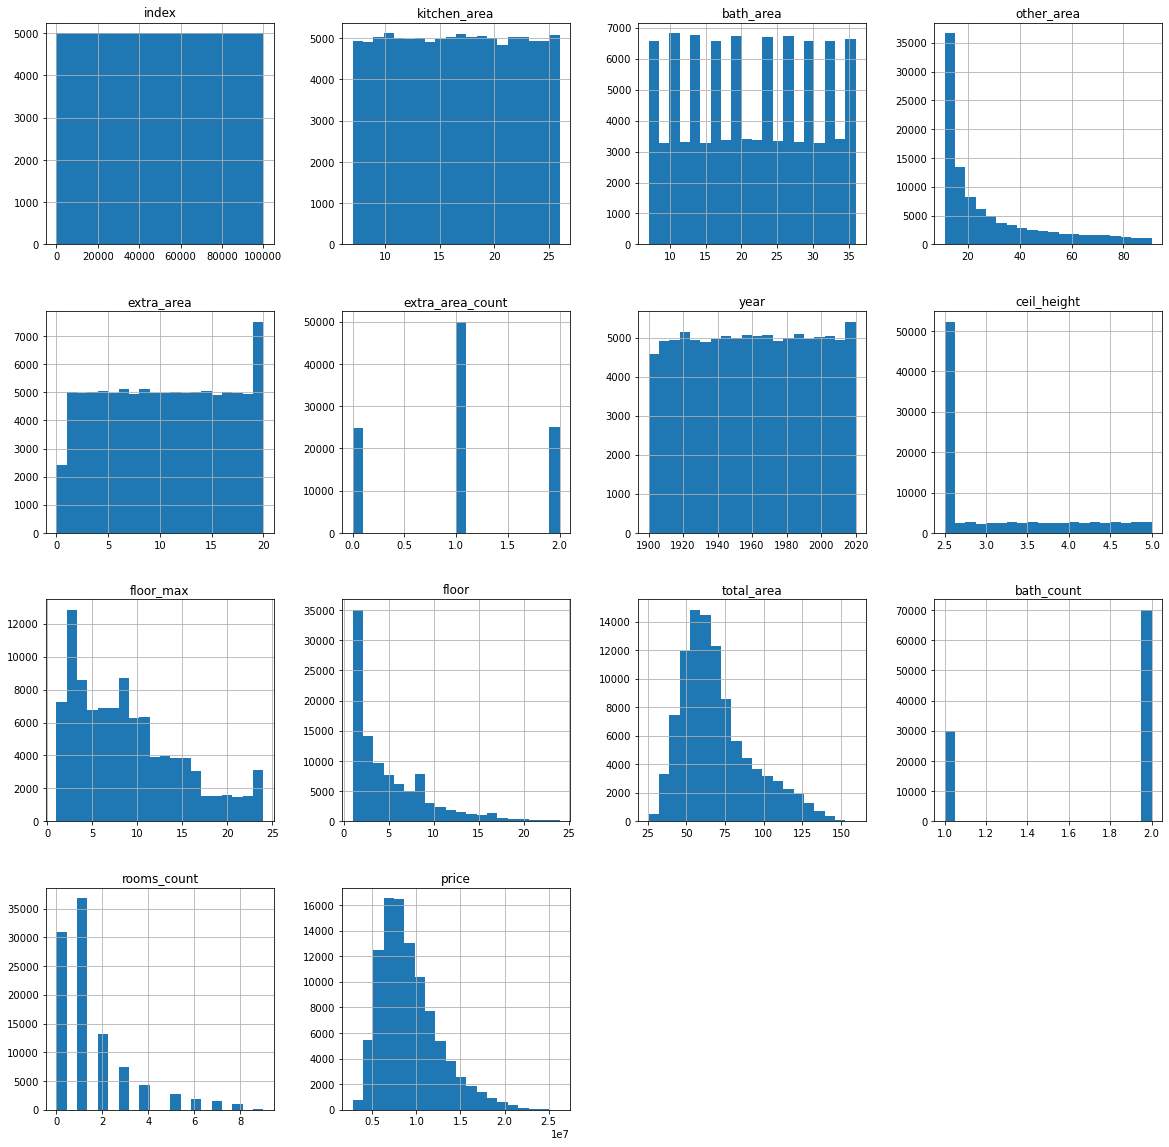

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt 
flat.hist(bins=20, figsize=(20, 20))
plt.show()

In [18]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

next line of codes will create different test set on every run. Eventually whole dataset will be in training. 

In [19]:
train_set, test_set = split_train_test(flat, 0.2)

In [20]:
len(train_set)

80000

In [21]:
len(test_set)

20000

##### Creating total area category to ensure instances from each category on test set

In [22]:
flat["total_area_cat"] = pd.cut(flat["total_area"],
                             bins=[25, 50, 75, 100, 125, 150, np.inf],
                             labels=[1, 2, 3, 4, 5, 6])

<AxesSubplot:>

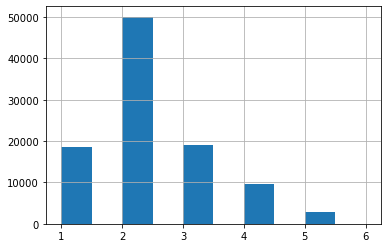

In [23]:
# the categories are below
flat["total_area_cat"].hist()

##### random sampling

In [24]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [25]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(flat, test_size=0.2, random_state=42)

##### Stratified sampling : ensure enough instances from each strata (i.e, each total area category above)

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit

flatSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in flatSplit.split(flat, flat["total_area_cat"]):
    strat_train_set = flat.loc[train_index]
    strat_test_set = flat.loc[test_index]

In [27]:
#proportion of total_area_cat in stratified test set
stratified = strat_test_set["total_area_cat"].value_counts() / len(strat_test_set)

In [28]:
#proportion of total_area_cat in whole dataset
overall = flat["total_area_cat"].value_counts() / len(flat)

In [29]:
# proportion of total_area_cat in randomly sampled test set
random = test_set["total_area_cat"].value_counts() / len(test_set)

In [30]:
# dropping total_area_cat for now to keep data intact
for set_ in (strat_train_set, strat_test_set):
    set_.drop("total_area_cat", axis=1, inplace=True)

#### Discover and Visualize the Data to Gain Insights


In [31]:
flat = strat_train_set.copy()

###### looking for correlation

In [32]:
corr_matrix = flat.corr()

In [33]:
corr_matrix["price"].sort_values(ascending=False)

price               1.000000
total_area          0.870801
other_area          0.761150
rooms_count         0.622726
bath_area           0.346307
bath_count          0.278787
kitchen_area        0.226264
extra_area          0.070513
ceil_height         0.020078
extra_area_count    0.010034
index               0.001530
floor              -0.009185
floor_max          -0.018470
year               -0.021471
Name: price, dtype: float64

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='total_area', ylabel='price'>,
        <AxesSubplot:xlabel='other_area', ylabel='price'>,
        <AxesSubplot:xlabel='rooms_count', ylabel='price'>,
        <AxesSubplot:xlabel='bath_area', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='other_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms_count', ylabel='total_area'>,
        <AxesSubplot:xlabel='bath_area', ylabel='total_area'>],
       [<AxesSubplot:xlabel='price', ylabel='other_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='other_area'>,
        <AxesSubplot:xlabel='other_area', ylabel='other_area'>,
        <AxesSubplot:xlabel='rooms_count', ylabel='other_area'>,
        <AxesSubplot:xlabel='bath_area', ylabel='other_area'>],
       [<AxesSubplot:xlabel='price', ylabel='rooms_count'>,
        <AxesSubp

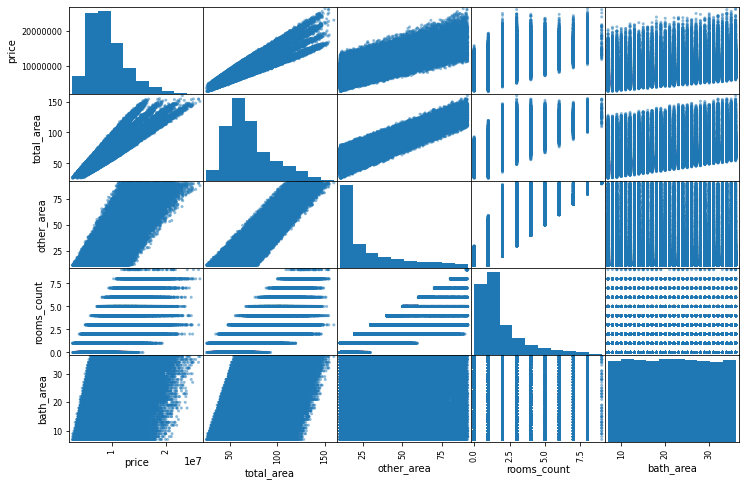

In [34]:
# scatter_matrix shows correlation
from pandas.plotting import scatter_matrix
attributes = ["price", "total_area", "other_area", "rooms_count", "bath_area"]
scatter_matrix(flat[attributes], figsize=(12, 8))

<AxesSubplot:xlabel='total_area', ylabel='price'>

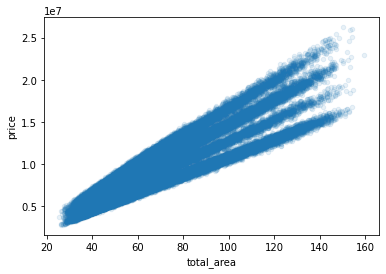

In [35]:
# most important attribute is total_area to predict price. So zooming in on it
flat.plot(kind="scatter", x="total_area", y="price", alpha=0.1)

#### Experimenting with Attribute Combinations

In [36]:
flat["bath_area_per_total_area"] = flat["bath_area"] / flat["total_area"]
flat["extra_area_per_total_area"] = flat["extra_area"] / flat["total_area"]
flat["extra_area_count_per_room"] = flat["extra_area"] / flat["rooms_count"]

In [37]:
corr_matrix = flat.corr()

In [38]:
corr_matrix["price"].sort_values(ascending=False)

price                        1.000000
total_area                   0.870801
other_area                   0.761150
rooms_count                  0.622726
bath_area                    0.346307
bath_count                   0.278787
kitchen_area                 0.226264
extra_area                   0.070513
ceil_height                  0.020078
extra_area_count             0.010034
index                        0.001530
floor                       -0.009185
floor_max                   -0.018470
year                        -0.021471
bath_area_per_total_area    -0.244851
extra_area_count_per_room   -0.310763
extra_area_per_total_area   -0.311376
Name: price, dtype: float64

In [39]:
# revert to a clean training set
flat = strat_train_set.drop("price", axis=1)
flat_labels = strat_train_set["price"].copy()

### preparing the data for machine learning algorithms

###### Data cleaning : Copy of data without text and categorical attributes

In [40]:
flat_numerical = flat.drop(["gas", "hot_water", "central_heating", "extra_area_type_name", "district_name"], axis=1)

###### Handling Text and Categorical Attributes

In [41]:
gas_cat = flat[["gas"]]
hotwater_cat = flat[["hot_water"]]
heating_cat = flat[["central_heating"]]
extra_area_name_cat = flat[["extra_area_type_name"]]
district_name_cat = flat[["extra_area_type_name"]]

In [42]:
gas_cat.head(5)

,gas
31678,No
96877,No
53491,Yes
80350,No
37667,No


In [43]:
# from text to numbers
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
gas_cat_encoded = ordinal_encoder.fit_transform(gas_cat)
hotwater_cat_encoded = ordinal_encoder.fit_transform(hotwater_cat)
heating_cat_encoded = ordinal_encoder.fit_transform(heating_cat)
extra_area_name_cat_encoded = ordinal_encoder.fit_transform(extra_area_name_cat)
district_name_cat_encoded = ordinal_encoder.fit_transform(district_name_cat)

In [44]:
ordinal_encoder.categories_

[array(['balcony', 'loggia'], dtype=object)]

###### OrdinalEncoder will introduce order (i.e, 1 < 2 < 3 < 4.....) which ML algorithms can misinterpret regardless of importance.

In [45]:
from sklearn.preprocessing import OneHotEncoder
extra_area_name_encoder = OneHotEncoder()
extra_area_name_1hot = extra_area_name_encoder.fit_transform(extra_area_name_cat)
extra_area_name_1hot

<80000x2 sparse matrix of type '<class 'numpy.float64'>'
	with 80000 stored elements in Compressed Sparse Row format>

In [46]:
extra_area_name_encoder.categories_

[array(['balcony', 'loggia'], dtype=object)]

In [47]:
gas_encoder = OneHotEncoder()
gas_1hot = gas_encoder.fit_transform(gas_cat)
gas_1hot

<80000x2 sparse matrix of type '<class 'numpy.float64'>'
	with 80000 stored elements in Compressed Sparse Row format>

In [48]:
district_name_encoder = OneHotEncoder()
district_name_1hot = district_name_encoder.fit_transform(district_name_cat)
district_name_1hot

<80000x2 sparse matrix of type '<class 'numpy.float64'>'
	with 80000 stored elements in Compressed Sparse Row format>

In [49]:
hotwater_encoder = OneHotEncoder()
hotwater_1hot = hotwater_encoder.fit_transform(hotwater_cat)
hotwater_1hot

<80000x2 sparse matrix of type '<class 'numpy.float64'>'
	with 80000 stored elements in Compressed Sparse Row format>

In [50]:
heating_encoder = OneHotEncoder()
heating_1hot = heating_encoder.fit_transform(heating_cat)
heating_1hot

<80000x2 sparse matrix of type '<class 'numpy.float64'>'
	with 80000 stored elements in Compressed Sparse Row format>

###### Custom Transformers

In [51]:
from sklearn.base import BaseEstimator, TransformerMixin

In [52]:
total_area_ix, rooms_count_ix, bath_area_ix, extra_area_ix, extra_area_count_ix = 7, 6, 5, 4, 3

In [53]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_extra_area_per_total_area = True): # no *args or **kargs
        self.add_extra_area_per_total_area = add_extra_area_per_total_area
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        extra_area_count_per_room = X[:, extra_area_count_ix] / X[:, rooms_count_ix]
        bath_area_per_total_area = X[:, bath_area_ix] / X[:, total_area_ix]
        if self.add_extra_area_per_total_area:
            extra_area_per_total_area = X[:, extra_area_ix] / X[:, total_area_ix]
            return np.c_[X, extra_area_count_per_room, bath_area_per_total_area,
            extra_area_per_total_area]
        else:
            return np.c_[X, extra_area_count_per_room, bath_area_per_total_area]

        
attr_adder = CombinedAttributesAdder(add_extra_area_per_total_area=False)
flat_numerical_extra_attribs = attr_adder.transform(flat_numerical.values)


### Feature scaling

###### standard scaler would be used 

### Transformation pipeline

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
                        ])
flat_numerical_tr = num_pipeline.fit_transform(flat_numerical)

###### ColumnTransformer will beused to handle both categorical and numerical columns at once

In [55]:
from sklearn.compose import ColumnTransformer

num_attribs = list(flat_numerical)
cat_attribs = ["gas", "hot_water", "central_heating", "extra_area_type_name", "district_name"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

flat_prepared = full_pipeline.fit_transform(flat)

### Select and Train a Model

###### Training and Evaluating on the Training Set

In [56]:
# train a linear regression model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(flat_prepared, flat_labels)

LinearRegression()

In [57]:
# try the model on some instance of training data
some_data = flat.iloc[:5]
some_labels = flat_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("predictions:", lin_reg.predict(some_data_prepared))

predictions: [6002658. 9886370. 5343554. 3843362. 8329748.]


In [58]:
print("labels:", list(some_labels))

labels: [6401287, 9930095, 5726062, 4379594, 8275124]


In [59]:
# measuring model's accuracy on whole trainig dataset
from sklearn.metrics import mean_squared_error
linreg_flat_predictions = lin_reg.predict(flat_prepared)
lin_mse = mean_squared_error(flat_labels, linreg_flat_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

537631.7216415547

In [60]:
strat_train_set["price"].describe()

count    8.000000e+04
mean     9.200088e+06
std      3.379715e+06
min      2.757564e+06
25%      6.746088e+06
50%      8.501266e+06
75%      1.097153e+07
max      2.623385e+07
Name: price, dtype: float64

In [61]:
# another model 
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(flat_prepared, flat_labels)

DecisionTreeRegressor()

In [62]:
tree_flat_predictions = tree_reg.predict(flat_prepared)
tree_mse = mean_squared_error(flat_labels, tree_flat_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

###### No error! probably the model has overfit the data too much. Will use part of the training set for model validation.

### Cross Validation to evaluate better

In [63]:
from sklearn.model_selection import cross_val_score
tree_scores = cross_val_score(tree_reg, flat_prepared, flat_labels,
                        scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)

In [64]:
# results
def display_scores(scores):
    print("scores:", scores)
    print("mean:", scores.mean())
    print("standard deviation:", scores.std())

display_scores(tree_rmse_scores)

scores: [259449.73287572 260542.61676975 256698.56247626 263774.26330618
 257349.09184761 260496.94454443 255810.4938662  260124.98165188
 260067.61910589 264372.15613374]
mean: 259868.64625776553
standard deviation: 2636.880991072257


In [65]:
# computing score for linear regression model too
lin_scores = cross_val_score(lin_reg, flat_prepared, flat_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

scores: [536600.81413441 543302.40912545 536311.38040355 533843.38248923
 535975.19904896 544475.36253063 538524.38512695 545337.57473594
 531347.49150826 536139.79351208]
mean: 538185.779261545
standard deviation: 4446.553592661205


In [66]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(flat_prepared, flat_labels)

RandomForestRegressor()

In [67]:
# predictions
forest_flat_predictions = forest_reg.predict(flat_prepared)
forest_mse = mean_squared_error(flat_labels, forest_flat_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

66164.78450507131

In [68]:
# computing score for Random Forest model
forest_scores = cross_val_score(forest_reg, flat_prepared, flat_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

In [69]:
# results
display_scores(forest_rmse_scores)

scores: [177169.79968032 178064.22395511 178753.77421215 181243.85970567
 179711.05914369 182430.97146232 177852.55705527 179264.77551689
 177240.76340618 177939.30288774]
mean: 178967.10870253373
standard deviation: 1649.0578699051503


### Fine tune the model

In [70]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

grid_search.fit(flat_prepared, flat_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [71]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [72]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [73]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

1039844.4233851398 {'max_features': 2, 'n_estimators': 3}
776823.1883298764 {'max_features': 2, 'n_estimators': 10}
687498.8031829505 {'max_features': 2, 'n_estimators': 30}
624853.2054312557 {'max_features': 4, 'n_estimators': 3}
428014.80714822956 {'max_features': 4, 'n_estimators': 10}
356005.67743135476 {'max_features': 4, 'n_estimators': 30}
430259.3282732472 {'max_features': 6, 'n_estimators': 3}
309946.936720583 {'max_features': 6, 'n_estimators': 10}
261623.81528759957 {'max_features': 6, 'n_estimators': 30}
346439.7754589042 {'max_features': 8, 'n_estimators': 3}
259717.26028344565 {'max_features': 8, 'n_estimators': 10}
231447.3223416565 {'max_features': 8, 'n_estimators': 30}
990733.4687078347 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
758286.9660932454 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
781114.8951293455 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
531664.9541443187 {'bootstrap': False, 'max_features': 3, 'n_estimators'

###### Analyze the Best Models and Their Errors

In [74]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([1.00169395e-03, 1.47395704e-02, 2.72350425e-02, 8.63635998e-02,
       1.24830004e-03, 2.96559629e-04, 1.24261695e-03, 8.89062710e-04,
       8.45896762e-04, 8.44754977e-04, 3.46908794e-01, 1.89207899e-02,
       9.66642370e-02, 1.73607333e-01, 6.55854020e-04, 1.19014770e-03,
       1.55813131e-04, 1.48425169e-04, 1.51869692e-04, 1.51997707e-04,
       1.86433549e-04, 2.02732518e-04, 1.24456743e-04, 1.25239333e-04,
       2.69981847e-02, 2.38829098e-02, 2.43687683e-02, 8.93719664e-02,
       9.80305629e-03, 2.81913421e-02, 2.34825515e-02])

In [75]:
# feature importance score with corresponding attribute
extra_attribs = ["extra_a_per_total_a", "bath_a_per_total_a", "extra_a_count_per_room_count"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3469087940833297, 'total_area'),
 (0.17360733259758546, 'extra_a_per_total_a'),
 (0.09666423698856996, 'rooms_count'),
 (0.08636359976920283, 'other_area'),
 (0.027235042545467405, 'bath_area'),
 (0.01892078986372037, 'bath_count'),
 (0.014739570399616014, 'kitchen_area'),
 (0.0012483000412345526, 'extra_area'),
 (0.0012426169530679238, 'year'),
 (0.0011901477037620748, 'extra_a_count_per_room_count'),
 (0.0010016939502962149, 'index'),
 (0.0008890627102601967, 'ceil_height'),
 (0.0008458967620520635, 'floor_max'),
 (0.0008447549769116083, 'floor'),
 (0.0006558540204023583, 'bath_a_per_total_a'),
 (0.0002965596288559091, 'extra_area_count'),
 (0.00015581313106007092, 'No'),
 (0.0001484251689706362, 'Yes')]

### Evaluate System on the Test Set

In [76]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("price", axis=1)
y_test = strat_test_set["price"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

223886.4730595138

######  confidence interval for the generalization error

In [77]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([220527.87818812, 227195.42376532])